In [5]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:90% !important; }</style>"))

# Confusion matrix with std

In [6]:
import matplotlib.pyplot as plt

#%matplotlib inline
import os
import sys


import numpy as np

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf

tf.autograph.set_verbosity(2)

PROJECT_PATH = os.path.join("..")
sys.path.append(PROJECT_PATH)
from models.classifiers.deepHits_nans_norm_crop_stamp_model import (
    DeepHiTSNanNormCropStampModel,
)
from models.classifiers.deepHits_entopy_reg_model import DeepHiTSEntropyRegModel
from parameters import param_keys, general_keys
from modules.data_set_generic import Dataset
from scripts.plot_confusion_matrix import plot_confusion_matrix, plot_cm_std
from sklearn.metrics import confusion_matrix
import pandas as pd
from glob import glob

import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

from IPython.display import display_html


def restartkernel():
    display_html("<script>Jupyter.notebook.kernel.restart()</script>", raw=True)


""" Use restartkernel() to restart the kernel """

' Use restartkernel() to restart the kernel '

In [7]:
# instance model and load weights

data_path = os.path.join("../../pickles", "training_set_Apr-23-2020_all_bogus.pkl")
# data_path = "../../pickles/converted_data.pkl"

n_classes = 5
params = {
    param_keys.DATA_PATH_TRAIN: data_path,
    param_keys.WAIT_FIRST_EPOCH: False,
    param_keys.N_INPUT_CHANNELS: 3,
    param_keys.CHANNELS_TO_USE: [0, 1, 2],
    param_keys.TRAIN_ITERATIONS_HORIZON: 30000,
    param_keys.TRAIN_HORIZON_INCREMENT: 10000,
    param_keys.TEST_SIZE: n_classes * 50,
    param_keys.VAL_SIZE: n_classes * 50,
    param_keys.NANS_TO: 0,
    param_keys.NUMBER_OF_CLASSES: n_classes,
    param_keys.CROP_SIZE: 21,
    param_keys.INPUT_IMAGE_SIZE: 21,
    param_keys.VALIDATION_MONITOR: general_keys.LOSS,
    param_keys.VALIDATION_MODE: general_keys.MIN,
    param_keys.ENTROPY_REG_BETA: 0.5,
    param_keys.BATCH_SIZE: 32,
    param_keys.LEARNING_RATE: 1e-4,
    param_keys.DROP_RATE: 0.5,
    param_keys.KERNEL_SIZE: 3,
}


# model_paths = glob(os.path.join("../results/best_model_revision",'*'))
# model_paths = glob(os.path.join("../results/alerce_dataset_entropy_reg/",'DeepHitsEntropyRegBeta0.5000_*'))
model_paths = glob(
    os.path.join(
        "../results/with_features_beta_search", "DeepHitsEntropyRegBeta0.5000_*"
    )
)
model_paths

['../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_6_20200424-100500',
 '../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_0_20200424-093351',
 '../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_8_20200424-101519',
 '../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_5_20200424-095808',
 '../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_3_20200424-094823',
 '../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_7_20200424-100945',
 '../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_4_20200424-095308',
 '../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_2_20200424-094337',
 '../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_1_20200424-093851',
 '../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_9_20200424-102023']

In [8]:
model_list = []
for model_path in model_paths:
    graph = tf.Graph()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(graph=graph, config=config)
    with graph.as_default():
        model = DeepHiTSEntropyRegModel(params, session=sess)
        checkpoint_path_best_so_far = os.path.join(model_path, "checkpoints", "model")
        model.load_model(checkpoint_path_best_so_far)
        model_list.append(model)

train_set, val_set, test_set = model_list[0]._data_init()

INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0eb0136b00> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0eb0136b00> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0eb0136b00> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0eb0136b00> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0eb0136b00> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0eb0136b00> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0eb007cdd0> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0eb007cdd0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0eb007cdd0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0eb007cdd0> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0eb007cdd0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0eb007cdd0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0eb0024b10>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0eb0024b10>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0eb0024b10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0eb0024b10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0eb0138110>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0eb0138110>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0eb0138110>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0eb0138110>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0eb009f7d0>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0eb009f7d0>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0eb009f7d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0eb009f7d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f306fdf90>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f306fdf90>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f306fdf90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f306fdf90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c4f9f50>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c4f9f50>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c4f9f50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c4f9f50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee43c9e10>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee43c9e10>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee43c9e10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee43c9e10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0eb009f7d0>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0eb009f7d0>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0eb009f7d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0eb009f7d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0eb009f7d0>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0eb009f7d0>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0eb009f7d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0eb009f7d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0eb0138090>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0eb0138090>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0eb0138090>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0eb0138090>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee439eb90>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee439eb90>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee439eb90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee439eb90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee439eb90>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee439eb90>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee439eb90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee439eb90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ec026af50>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ec026af50>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ec026af50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ec026af50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0eb009f7d0>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0eb009f7d0>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0eb009f7d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0eb009f7d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_6_20200424-100500/checkpoints/model


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_6_20200424-100500/checkpoints/model


INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0e9c2fa830> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0e9c2fa830> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0e9c2fa830> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0e9c2fa830> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0e9c2fa830> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0e9c2fa830> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0e9c24a830> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0e9c24a830> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0e9c24a830> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0e9c24a830> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0e9c24a830> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0e9c24a830> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c1e4e10>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c1e4e10>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c1e4e10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c1e4e10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c1e4d90>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c1e4d90>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c1e4d90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c1e4d90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0e9c1eab50>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0e9c1eab50>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0e9c1eab50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0e9c1eab50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c1e4a10>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c1e4a10>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c1e4a10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c1e4a10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c2f64d0>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c2f64d0>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c2f64d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c2f64d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c2f65d0>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c2f65d0>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c2f65d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0e9c2f65d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0e9c1eab50>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0e9c1eab50>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0e9c1eab50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0e9c1eab50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0e9c1eab50>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0e9c1eab50>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0e9c1eab50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0e9c1eab50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0e9c3395d0>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0e9c3395d0>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0e9c3395d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0e9c3395d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4708b90>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4708b90>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4708b90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4708b90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0fa89b0750>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0fa89b0750>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0fa89b0750>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0fa89b0750>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0e9c1e4e90>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0e9c1e4e90>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0e9c1e4e90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0e9c1e4e90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0e9c1eab50>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0e9c1eab50>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0e9c1eab50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0e9c1eab50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_0_20200424-093351/checkpoints/model


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_0_20200424-093351/checkpoints/model


INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f40bdf3b0> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f40bdf3b0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f40bdf3b0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f40bdf3b0> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f40bdf3b0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f40bdf3b0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ec0526050> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ec0526050> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ec0526050> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ec0526050> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ec0526050> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ec0526050> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec0331050>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec0331050>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec0331050>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec0331050>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8649850>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8649850>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8649850>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8649850>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ec051f990>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ec051f990>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ec051f990>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ec051f990>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec0338b90>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec0338b90>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec0338b90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec0338b90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8649050>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8649050>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8649050>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8649050>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef82d5f90>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef82d5f90>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef82d5f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef82d5f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ec051f990>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ec051f990>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ec051f990>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ec051f990>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ec051f990>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ec051f990>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ec051f990>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ec051f990>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4137b90>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4137b90>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4137b90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4137b90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f381c2950>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f381c2950>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f381c2950>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f381c2950>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f381c2950>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f381c2950>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f381c2950>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f381c2950>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4137b90>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4137b90>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4137b90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4137b90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ec051f990>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ec051f990>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ec051f990>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ec051f990>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_8_20200424-101519/checkpoints/model


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_8_20200424-101519/checkpoints/model


INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f38090a70> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f38090a70> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f38090a70> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f38090a70> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f38090a70> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f38090a70> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee437da70> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee437da70> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee437da70> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee437da70> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee437da70> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee437da70> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef829acd0>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef829acd0>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef829acd0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef829acd0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef829ac10>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef829ac10>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef829ac10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef829ac10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef827f2d0>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef827f2d0>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef827f2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef827f2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30483310>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30483310>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30483310>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30483310>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4298790>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4298790>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4298790>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4298790>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f3821dfd0>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f3821dfd0>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f3821dfd0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f3821dfd0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef827f2d0>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef827f2d0>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef827f2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef827f2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ef827f2d0>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ef827f2d0>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ef827f2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ef827f2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f304b0250>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f304b0250>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f304b0250>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f304b0250>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3821dfd0>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3821dfd0>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3821dfd0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3821dfd0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee40cef10>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee40cef10>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee40cef10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee40cef10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3809d690>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3809d690>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3809d690>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3809d690>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef827f2d0>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef827f2d0>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef827f2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef827f2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_5_20200424-095808/checkpoints/model


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_5_20200424-095808/checkpoints/model


INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef80cb4d0> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef80cb4d0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef80cb4d0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef80cb4d0> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef80cb4d0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef80cb4d0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee4611830> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee4611830> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee4611830> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee4611830> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee4611830> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee4611830> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4605cd0>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4605cd0>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4605cd0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4605cd0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4605a50>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4605a50>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4605a50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4605a50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef86741d0>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef86741d0>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef86741d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef86741d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30608450>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30608450>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30608450>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30608450>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef80ebcd0>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef80ebcd0>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef80ebcd0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef80ebcd0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30608450>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30608450>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30608450>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30608450>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef86741d0>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef86741d0>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef86741d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ef86741d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ef86741d0>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ef86741d0>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ef86741d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ef86741d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4634610>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4634610>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4634610>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4634610>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3011c710>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3011c710>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3011c710>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3011c710>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f3011c710>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f3011c710>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f3011c710>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f3011c710>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef80eb4d0>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef80eb4d0>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef80eb4d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef80eb4d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef86741d0>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef86741d0>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef86741d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef86741d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_3_20200424-094823/checkpoints/model


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_3_20200424-094823/checkpoints/model


INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee44aeef0> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee44aeef0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee44aeef0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee44aeef0> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee44aeef0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee44aeef0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee44aed40> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee44aed40> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee44aed40> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee44aed40> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee44aed40> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee44aed40> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1290>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1290>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1290>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1290>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1350>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1350>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1350>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1350>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304ee2d0>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304ee2d0>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304ee2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304ee2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1310>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1310>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1310>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1310>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1450>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1450>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1450>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f304e1450>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f383078d0>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f383078d0>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f383078d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f383078d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304ee2d0>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304ee2d0>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304ee2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304ee2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0f304ee2d0>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0f304ee2d0>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0f304ee2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0f304ee2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f38307210>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f38307210>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f38307210>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f38307210>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee46ffad0>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee46ffad0>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee46ffad0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee46ffad0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4707150>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4707150>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4707150>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4707150>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4711550>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4711550>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4711550>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4711550>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f304ee2d0>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f304ee2d0>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f304ee2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f304ee2d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_7_20200424-100945/checkpoints/model


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_7_20200424-100945/checkpoints/model


INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef8451950> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef8451950> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef8451950> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef8451950> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef8451950> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef8451950> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f3052d950> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f3052d950> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f3052d950> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f3052d950> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f3052d950> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f3052d950> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30533610>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30533610>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30533610>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30533610>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f305332d0>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f305332d0>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f305332d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f305332d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304f9f90>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304f9f90>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304f9f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304f9f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30533890>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30533890>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30533890>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f30533890>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef844ba50>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef844ba50>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef844ba50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef844ba50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f382d5d50>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f382d5d50>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f382d5d50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f382d5d50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304f9f90>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304f9f90>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304f9f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f304f9f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0f304f9f90>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0f304f9f90>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0f304f9f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0f304f9f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef8460a10>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef8460a10>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef8460a10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef8460a10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef8545e90>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef8545e90>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef8545e90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef8545e90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef856a750>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef856a750>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef856a750>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef856a750>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f382d5d50>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f382d5d50>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f382d5d50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f382d5d50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f304f9f90>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f304f9f90>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f304f9f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f304f9f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_4_20200424-095308/checkpoints/model


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_4_20200424-095308/checkpoints/model


INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee45633b0> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee45633b0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee45633b0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee45633b0> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee45633b0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee45633b0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f302bb0e0> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f302bb0e0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f302bb0e0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f302bb0e0> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f302bb0e0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0f302bb0e0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f302c2610>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f302c2610>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f302c2610>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f302c2610>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f302c25d0>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f302c25d0>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f302c25d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f302c25d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f302c9d90>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f302c9d90>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f302c9d90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f302c9d90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f302c28d0>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f302c28d0>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f302c28d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0f302c28d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee454a810>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee454a810>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee454a810>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee454a810>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee454a850>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee454a850>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee454a850>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee454a850>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f302c9d90>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f302c9d90>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f302c9d90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0f302c9d90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0f302c9d90>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0f302c9d90>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0f302c9d90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0f302c9d90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee454cc10>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee454cc10>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee454cc10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee454cc10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3017eb50>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3017eb50>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3017eb50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f3017eb50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f3017eb50>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f3017eb50>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f3017eb50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f3017eb50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f307e4890>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f307e4890>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f307e4890>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f307e4890>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f302c9d90>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f302c9d90>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f302c9d90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f302c9d90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_2_20200424-094337/checkpoints/model


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_2_20200424-094337/checkpoints/model


INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee47e4dd0> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee47e4dd0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee47e4dd0> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee47e4dd0> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee47e4dd0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee47e4dd0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ec05adb00> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ec05adb00> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ec05adb00> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ec05adb00> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ec05adb00> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ec05adb00> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec05b1c50>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec05b1c50>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec05b1c50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec05b1c50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8334fd0>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8334fd0>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8334fd0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8334fd0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee4324090>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee4324090>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee4324090>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee4324090>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec059a190>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec059a190>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec059a190>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec059a190>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec05b1650>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec05b1650>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec05b1650>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec05b1650>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec05b1910>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec05b1910>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec05b1910>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ec05b1910>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee4324090>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee4324090>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee4324090>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee4324090>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ee4324090>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ee4324090>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ee4324090>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ee4324090>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef8321a10>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef8321a10>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef8321a10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef8321a10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f306d9a10>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f306d9a10>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f306d9a10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0f306d9a10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f306d9a10>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f306d9a10>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f306d9a10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0f306d9a10>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef8302210>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef8302210>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef8302210>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef8302210>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4324090>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4324090>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4324090>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee4324090>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_1_20200424-093851/checkpoints/model


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_1_20200424-093851/checkpoints/model


INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef872d830> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef872d830> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef872d830> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef872d830> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef872d830> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ef872d830> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f0f466e97a0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}



INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f0f466e97a0>: default rule


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee43ff200> : None


INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee43ff200> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee43ff200> : None


INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee43ff200> : None


INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee43ff200> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f0ee43ff200> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function rot90 at 0x7f0f4cbcecb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <function concat at 0x7f0f4dd83c20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4415e90>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4415e90>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4415e90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ee4415e90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef872f690>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef872f690>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef872f690>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef872f690>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee441d4d0>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee441d4d0>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee441d4d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee441d4d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8718f90>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8718f90>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8718f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8718f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef87aaf90>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef87aaf90>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef87aaf90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef87aaf90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8718f90>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8718f90>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8718f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f0ef8718f90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee441d4d0>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee441d4d0>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee441d4d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f0ee441d4d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ee441d4d0>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ee441d4d0>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ee441d4d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f0ee441d4d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef8736050>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef8736050>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef8736050>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ef8736050>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef872fd90>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef872fd90>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef872fd90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ef872fd90>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0e9c10ff50>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0e9c10ff50>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0e9c10ff50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0e9c10ff50>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4411690>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4411690>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}



INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4411690>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f0ee4411690>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee441d4d0>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee441d4d0>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}



INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee441d4d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f0ee441d4d0>>: DoNotConvert rule for tensorflow


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_9_20200424-102023/checkpoints/model


INFO:tensorflow:Restoring parameters from ../results/with_features_beta_search/DeepHitsEntropyRegBeta0.5000_9_20200424-102023/checkpoints/model
  0%|          | 0/40445 [00:00<?, ?it/s]

{'AGN': 0, 'SN': 1, 'VS': 2, 'asteroid': 3, 'bogus': 4}


100%|██████████| 40445/40445 [01:45<00:00, 385.05it/s]


Label count AGN: 9977 -SN: 1620 -VS: 9997 -asteroid: 9899 -bogus: 8952 -
464 misshaped samples removed
Label count AGN: 9831 -SN: 1596 -VS: 9832 -asteroid: 9799 -bogus: 8923 -
2397 samples with NaNs. NaNs replaced with number 0


In [9]:
normalize_cm = True
class_names = np.array(["AGN", "SN", "VS", "asteroid", "bogus"])
all_cms = []
for model in model_list:
    y_pred = model.predict(test_set.data_array)
    cm = confusion_matrix(test_set.data_label, y_pred)
    if normalize_cm:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix Acc %.4f" % (np.trace(cm) / np.sum(cm)))
    all_cms.append(cm)

all_cms = np.stack(all_cms)
mean_cm, std_cm = np.mean(all_cms, axis=0), np.std(all_cms, axis=0)

Normalized confusion matrix Acc 0.9000
Normalized confusion matrix Acc 0.9120
Normalized confusion matrix Acc 0.9080
Normalized confusion matrix Acc 0.9120
Normalized confusion matrix Acc 0.8880
Normalized confusion matrix Acc 0.8960
Normalized confusion matrix Acc 0.8880
Normalized confusion matrix Acc 0.9000
Normalized confusion matrix Acc 0.9080
Normalized confusion matrix Acc 0.8960


[[0.95 0.01 0.04 0.   0.  ]
 [0.03 0.82 0.   0.15 0.  ]
 [0.12 0.   0.88 0.   0.  ]
 [0.   0.02 0.   0.98 0.  ]
 [0.   0.08 0.   0.04 0.88]]


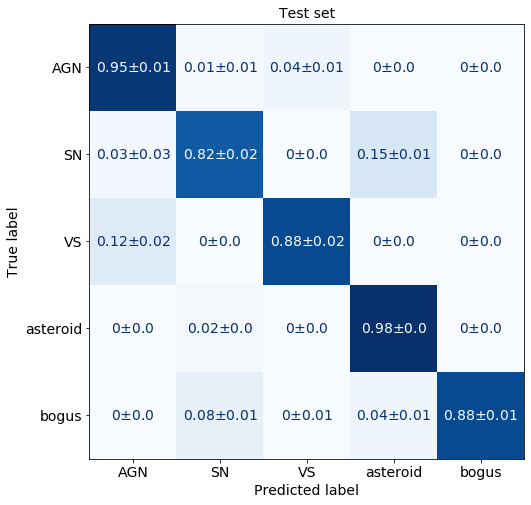

In [10]:
%matplotlib inline
p = plot_cm_std(
    mean_cm=mean_cm,
    std_cm=std_cm,
    title="Test set",
    classes=class_names,
    normalize=True,
    label_fontsize=14,
    axis_fontsize=14,
    colorbar=False,
    savepath="plots/paper_revision/mean_matrix.pdf",
)
plt.show()

# Inspecting examples from test set

In [8]:
def plot_examples(image_input, predictions, class_names, ztf_id):
    f, ax = plt.subplots(1, 3, figsize=(12, 4))
    ax[0].imshow(image_input[..., 0], cmap="inferno")
    ax[1].imshow(image_input[..., 1], cmap="inferno")
    ax[2].imshow(image_input[..., 2], cmap="inferno")
    ax[0].axis("off")
    ax[1].axis("off")
    ax[2].axis("off")
    prob_str = "Predicted probabilities:\n"
    for c, p in enumerate(predictions):
        prob_str += class_names[c] + ": " + str(np.round(p, 3)) + ", "
    ax[1].set_title(prob_str[:-2], fontsize=18)
    print(prob_str)
    print(predictions)
    print(ztf_id)
    plt.show()

In [9]:
features_keys = model_list[0].data_loader.features_keys

In [10]:
test_set.meta_data[0, :], test_set.data_array.shape

(array([0.8187710046768188, 0.02991768717765808, 0.9302440285682678,
        9.941370964050293, 0.1364399939775467, 10.246349334716797, 0,
        'ZTF18aaejsuv'], dtype=object),
 (250, 21, 21, 3))

Predicted probabilities:
AGN: 0.026, SN: 0.91, VS: 0.025, asteroid: 0.025, bogus: 0.014, 
[0.0260978  0.909636   0.02520131 0.02497825 0.01408664]
ZTF19abfdsbu


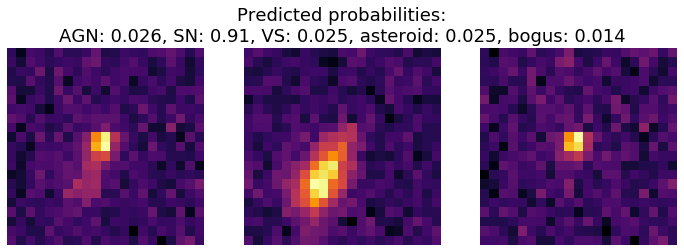

Predicted probabilities:
AGN: 0.084, SN: 0.755, VS: 0.063, asteroid: 0.042, bogus: 0.056, 
[0.08363938 0.7545885  0.06318451 0.04221483 0.05637277]
ZTF18aahmrtf


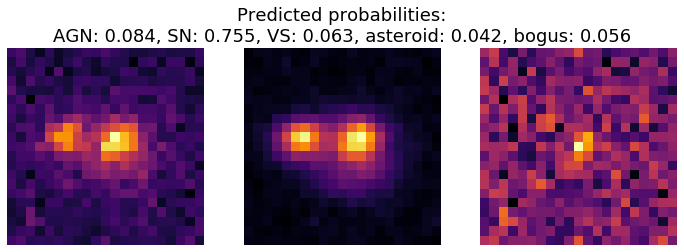

Predicted probabilities:
AGN: 0.014, SN: 0.941, VS: 0.027, asteroid: 0.015, bogus: 0.004, 
[0.01371456 0.94078267 0.02721133 0.01457505 0.00371634]
ZTF19aamnakq


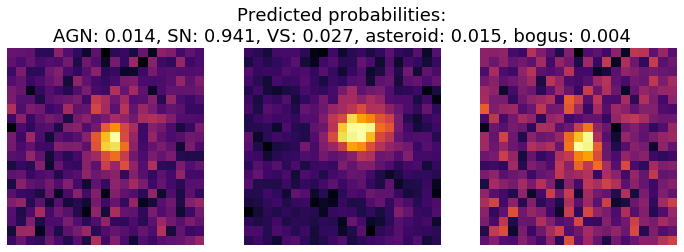

Predicted probabilities:
AGN: 0.046, SN: 0.047, VS: 0.048, asteroid: 0.839, bogus: 0.02, 
[0.04585329 0.04703576 0.04794788 0.8387245  0.02043858]
ZTF19abvgwvp


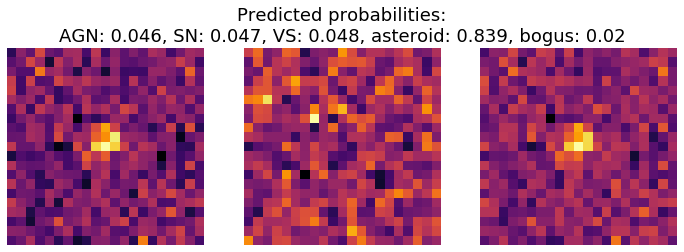

Predicted probabilities:
AGN: 0.015, SN: 0.922, VS: 0.02, asteroid: 0.019, bogus: 0.023, 
[0.01546703 0.92240983 0.02048794 0.01908789 0.02254727]
ZTF18acbxkpa


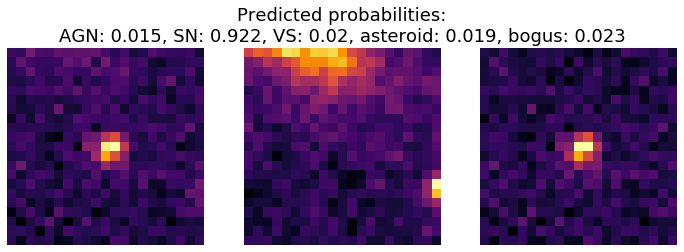

Predicted probabilities:
AGN: 0.049, SN: 0.569, VS: 0.038, asteroid: 0.265, bogus: 0.08, 
[0.04891    0.56857955 0.03790883 0.2648191  0.07978254]
ZTF19abhphah


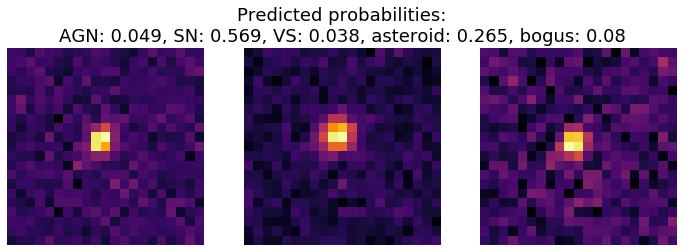

Predicted probabilities:
AGN: 0.093, SN: 0.496, VS: 0.058, asteroid: 0.274, bogus: 0.078, 
[0.093415   0.4964134  0.05785755 0.27418256 0.07813153]
ZTF18acrdwcf


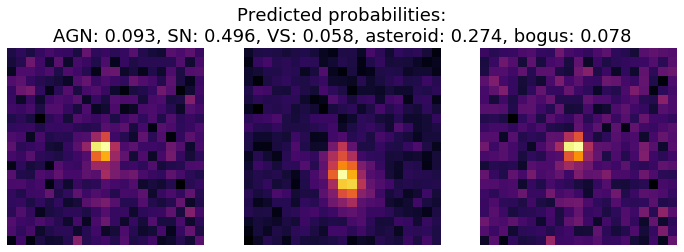

Predicted probabilities:
AGN: 0.052, SN: 0.513, VS: 0.072, asteroid: 0.278, bogus: 0.085, 
[0.05181719 0.5129107  0.07177611 0.27841073 0.08508529]
ZTF19abahvdh


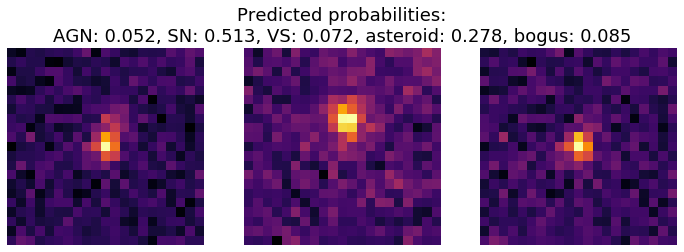

Predicted probabilities:
AGN: 0.048, SN: 0.817, VS: 0.046, asteroid: 0.051, bogus: 0.038, 
[0.048324   0.817413   0.04612009 0.05061081 0.03753212]
ZTF19aalckuo


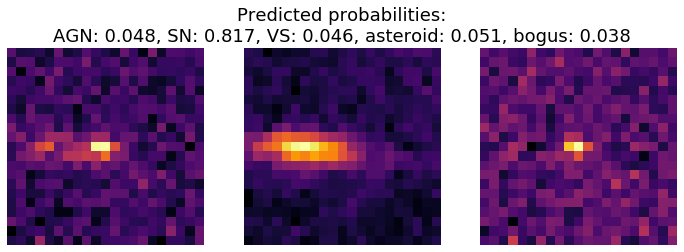

Predicted probabilities:
AGN: 0.094, SN: 0.408, VS: 0.048, asteroid: 0.423, bogus: 0.026, 
[0.09435589 0.40829477 0.04767201 0.42344016 0.02623717]
ZTF19abcfzdy


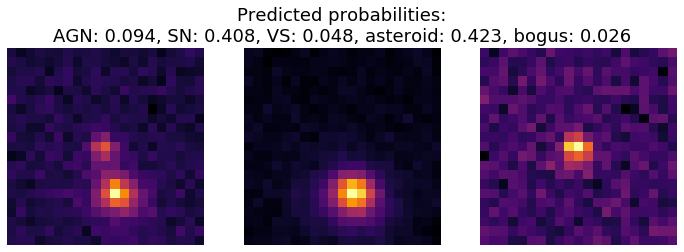

Predicted probabilities:
AGN: 0.235, SN: 0.651, VS: 0.048, asteroid: 0.037, bogus: 0.029, 
[0.23503911 0.6514836  0.04760556 0.03722034 0.02865131]
ZTF19abaejrh


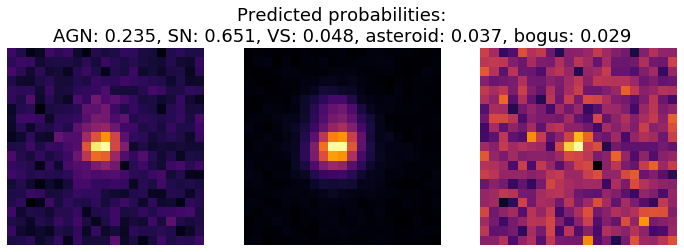

Predicted probabilities:
AGN: 0.028, SN: 0.829, VS: 0.054, asteroid: 0.055, bogus: 0.035, 
[0.02781338 0.82926583 0.05360737 0.05476885 0.03454456]
ZTF19abcejsg


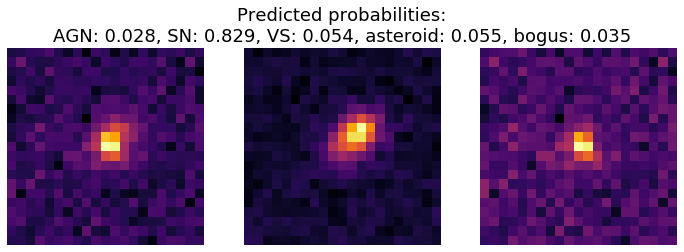

Predicted probabilities:
AGN: 0.013, SN: 0.939, VS: 0.027, asteroid: 0.008, bogus: 0.013, 
[0.01321569 0.93852556 0.02725354 0.00816486 0.0128404 ]
ZTF18acbxhua


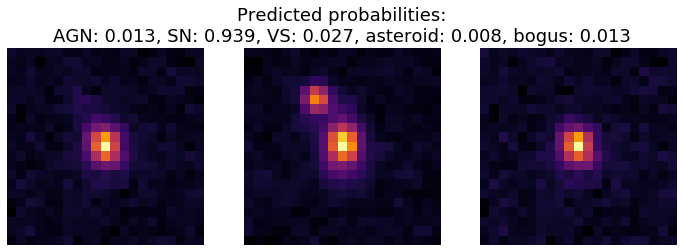

Predicted probabilities:
AGN: 0.042, SN: 0.74, VS: 0.071, asteroid: 0.057, bogus: 0.089, 
[0.04197364 0.74008274 0.07139963 0.05736877 0.08917516]
ZTF19acojuzv


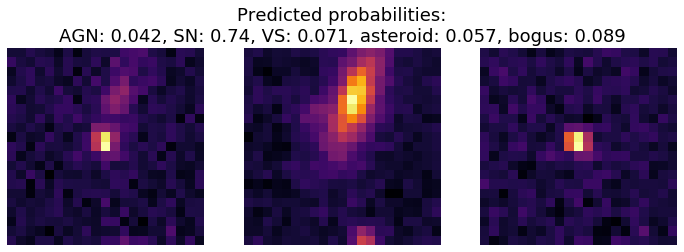

Predicted probabilities:
AGN: 0.064, SN: 0.796, VS: 0.05, asteroid: 0.053, bogus: 0.037, 
[0.06372221 0.7962339  0.04998429 0.05295996 0.03709975]
ZTF19aanuipr


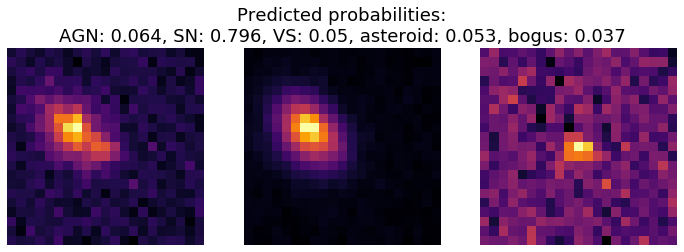

Predicted probabilities:
AGN: 0.042, SN: 0.861, VS: 0.04, asteroid: 0.029, bogus: 0.027, 
[0.04234354 0.8612007  0.04024683 0.02879161 0.02741739]
ZTF18abcyhju


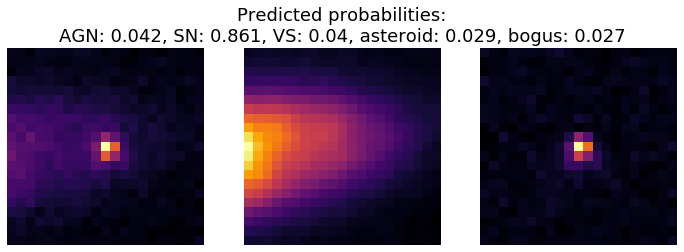

Predicted probabilities:
AGN: 0.451, SN: 0.426, VS: 0.051, asteroid: 0.046, bogus: 0.027, 
[0.45056954 0.4256981  0.05057966 0.04581191 0.02734079]
ZTF18abuhzfc


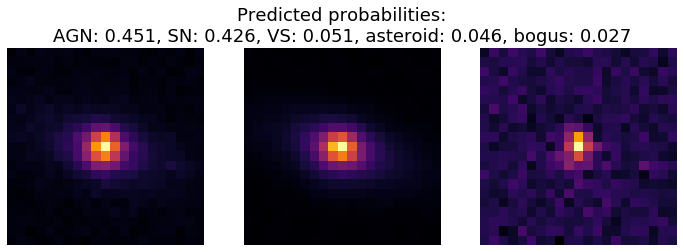

Predicted probabilities:
AGN: 0.583, SN: 0.255, VS: 0.068, asteroid: 0.066, bogus: 0.028, 
[0.5827884  0.25523597 0.06787179 0.06578416 0.02831967]
ZTF19abrirdm


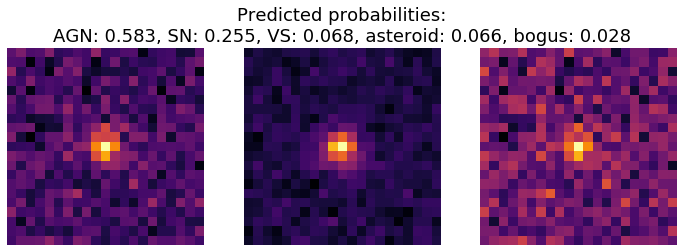

Predicted probabilities:
AGN: 0.028, SN: 0.912, VS: 0.023, asteroid: 0.02, bogus: 0.017, 
[0.02848175 0.9120339  0.02274536 0.02004387 0.01669513]
ZTF19abfwdyt


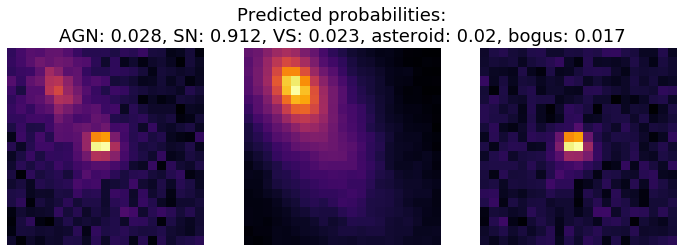

Predicted probabilities:
AGN: 0.049, SN: 0.83, VS: 0.041, asteroid: 0.043, bogus: 0.037, 
[0.04873831 0.82985604 0.04141271 0.04307497 0.03691792]
ZTF19acokzjy


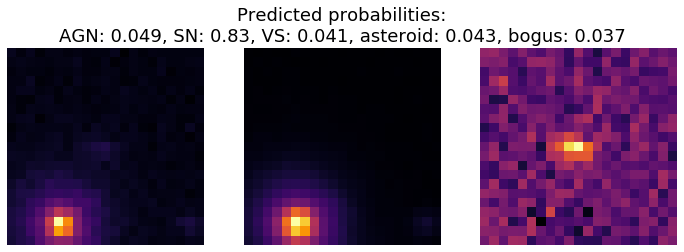

Predicted probabilities:
AGN: 0.053, SN: 0.128, VS: 0.07, asteroid: 0.67, bogus: 0.079, 
[0.05348061 0.12758929 0.07042688 0.6697072  0.0787961 ]
ZTF18absoomk


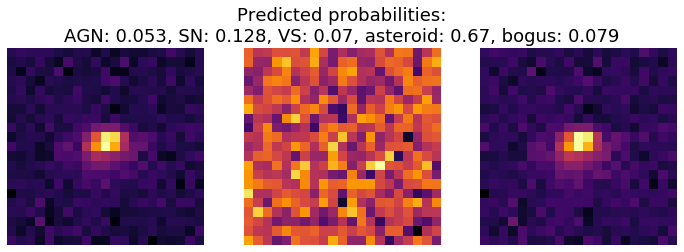

Predicted probabilities:
AGN: 0.027, SN: 0.907, VS: 0.026, asteroid: 0.024, bogus: 0.015, 
[0.02711352 0.90710574 0.02633584 0.02437749 0.01506738]
ZTF19aawgfnn


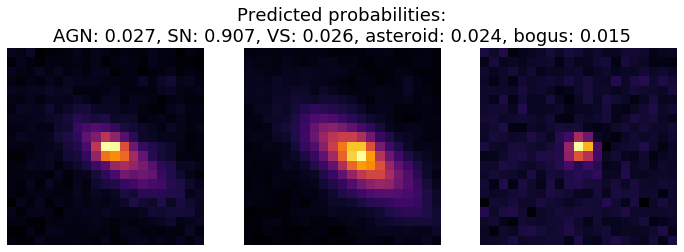

Predicted probabilities:
AGN: 0.031, SN: 0.88, VS: 0.03, asteroid: 0.033, bogus: 0.026, 
[0.03090307 0.8795912  0.03006369 0.03304386 0.02639808]
ZTF19aceqxtg


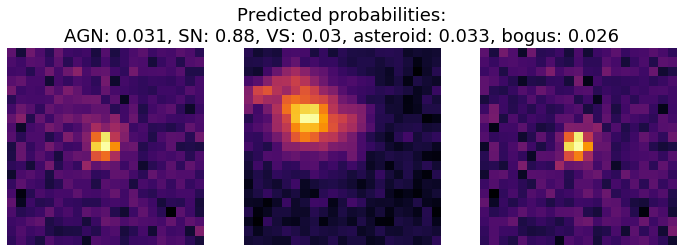

Predicted probabilities:
AGN: 0.271, SN: 0.564, VS: 0.07, asteroid: 0.058, bogus: 0.036, 
[0.2711629  0.56442064 0.07032663 0.05808814 0.03600167]
ZTF18acmznfc


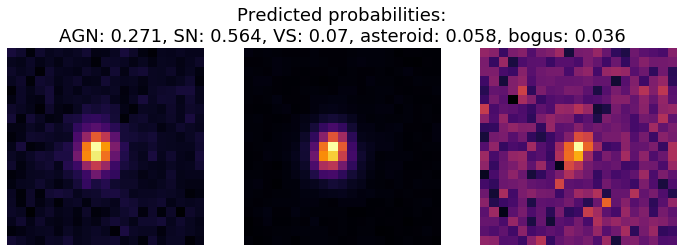

Predicted probabilities:
AGN: 0.182, SN: 0.679, VS: 0.086, asteroid: 0.028, bogus: 0.025, 
[0.18243691 0.6789557  0.08580961 0.02805156 0.02474628]
ZTF19acbmwtc


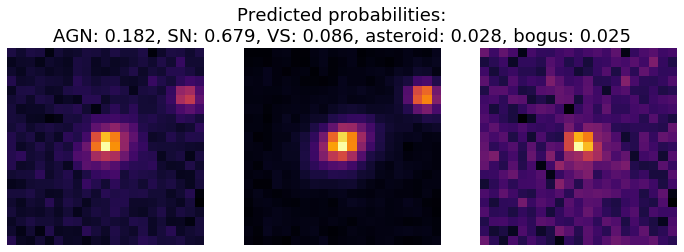

Predicted probabilities:
AGN: 0.034, SN: 0.826, VS: 0.04, asteroid: 0.059, bogus: 0.041, 
[0.03381003 0.82646394 0.03959918 0.05916744 0.04095944]
ZTF19aaynsyd


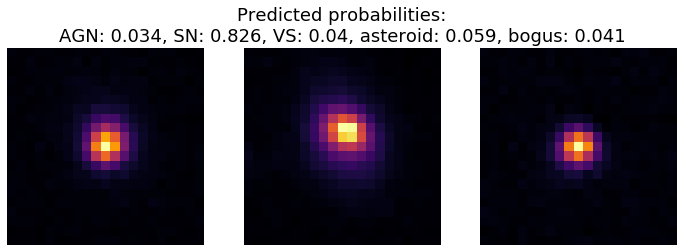

Predicted probabilities:
AGN: 0.458, SN: 0.289, VS: 0.088, asteroid: 0.103, bogus: 0.063, 
[0.45774093 0.28882223 0.08773893 0.1030899  0.06260792]
ZTF19aauitks


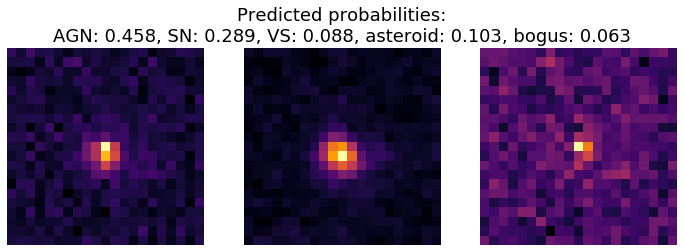

Predicted probabilities:
AGN: 0.022, SN: 0.921, VS: 0.023, asteroid: 0.023, bogus: 0.011, 
[0.02187037 0.9205772  0.02313777 0.02298337 0.01143133]
ZTF19aaprvar


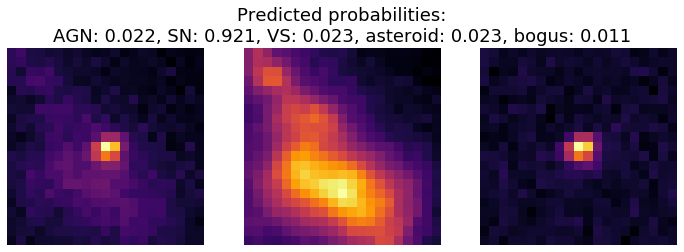

Predicted probabilities:
AGN: 0.042, SN: 0.161, VS: 0.04, asteroid: 0.608, bogus: 0.148, 
[0.04222581 0.16121578 0.04025765 0.6078953  0.14840542]
ZTF19abmqasg


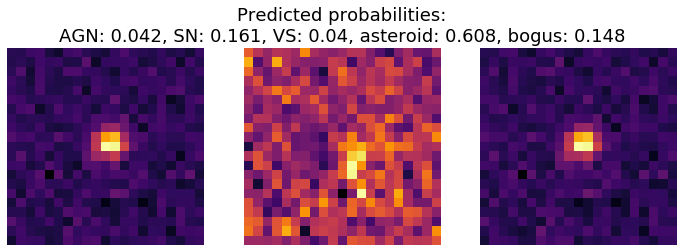

Predicted probabilities:
AGN: 0.227, SN: 0.634, VS: 0.05, asteroid: 0.048, bogus: 0.041, 
[0.22691192 0.63391304 0.04969569 0.04821616 0.04126326]
ZTF19acjwqvo


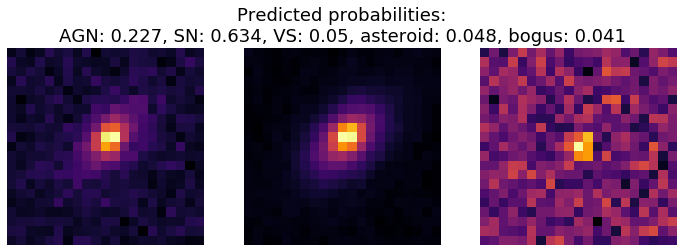

Predicted probabilities:
AGN: 0.031, SN: 0.891, VS: 0.033, asteroid: 0.018, bogus: 0.028, 
[0.0307955  0.8908081  0.03265222 0.01773379 0.02801027]
ZTF19aclkbqc


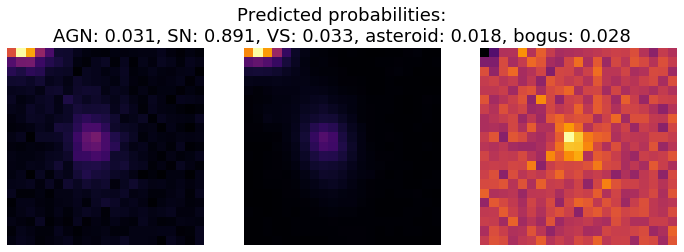

Predicted probabilities:
AGN: 0.015, SN: 0.948, VS: 0.02, asteroid: 0.012, bogus: 0.005, 
[0.01485584 0.9480351  0.01988707 0.01228705 0.00493485]
ZTF18abojpnr


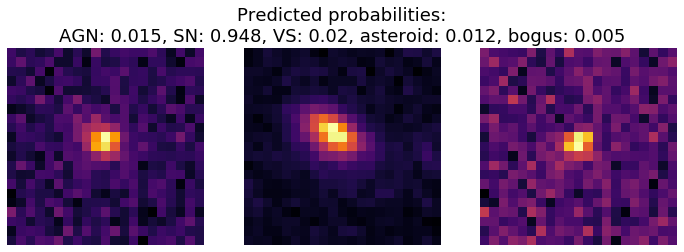

Predicted probabilities:
AGN: 0.061, SN: 0.851, VS: 0.032, asteroid: 0.04, bogus: 0.016, 
[0.06058873 0.8514384  0.0319823  0.04045059 0.01553994]
ZTF18adasisj


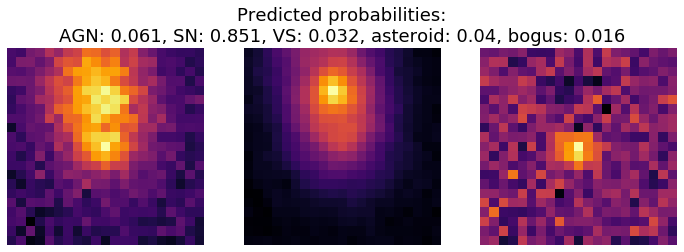

Predicted probabilities:
AGN: 0.066, SN: 0.77, VS: 0.055, asteroid: 0.049, bogus: 0.06, 
[0.06647614 0.7700039  0.05514251 0.04864908 0.05972831]
ZTF18abwdcdv


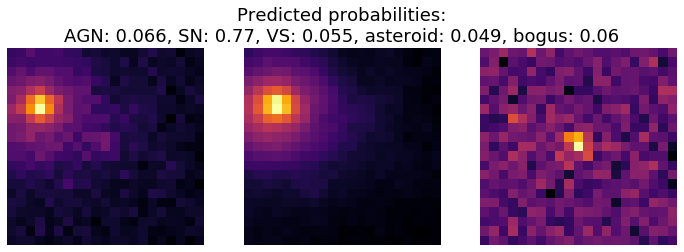

Predicted probabilities:
AGN: 0.017, SN: 0.926, VS: 0.03, asteroid: 0.015, bogus: 0.011, 
[0.01737407 0.92626214 0.03049845 0.01499081 0.01087454]
ZTF18abkhcrj


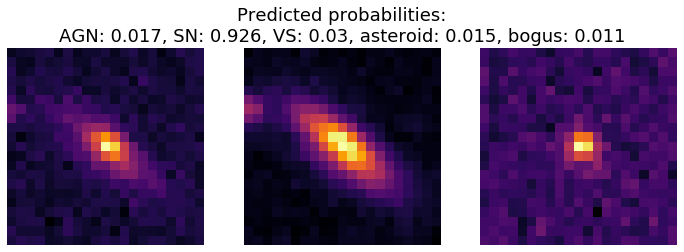

Predicted probabilities:
AGN: 0.087, SN: 0.192, VS: 0.1, asteroid: 0.535, bogus: 0.086, 
[0.08694641 0.19185425 0.09990296 0.53482723 0.08646913]
ZTF18absdxpk


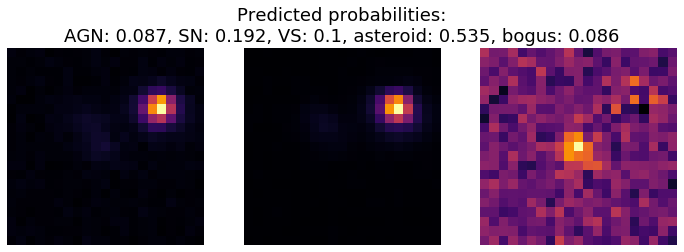

Predicted probabilities:
AGN: 0.044, SN: 0.08, VS: 0.046, asteroid: 0.785, bogus: 0.045, 
[0.04366852 0.08033907 0.04603812 0.7854261  0.04452821]
ZTF19aaoaaap


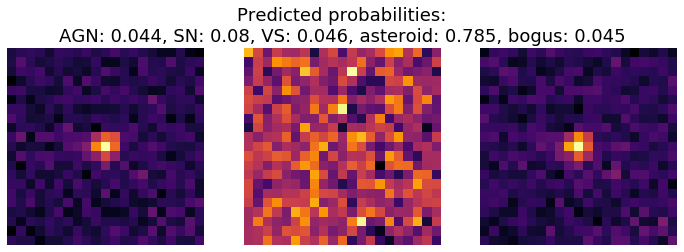

Predicted probabilities:
AGN: 0.05, SN: 0.898, VS: 0.019, asteroid: 0.02, bogus: 0.013, 
[0.04967389 0.8981765  0.01902042 0.02027046 0.01285878]
ZTF19acjwcyx


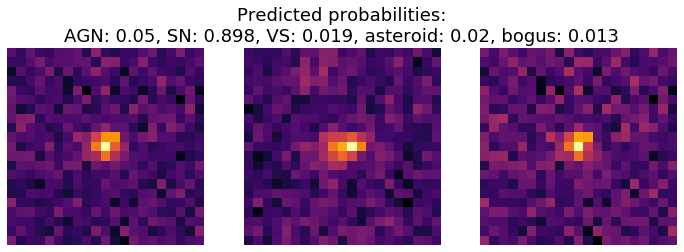

Predicted probabilities:
AGN: 0.032, SN: 0.793, VS: 0.039, asteroid: 0.031, bogus: 0.106, 
[0.03215593 0.7927717  0.03872874 0.03065711 0.10568656]
ZTF18aadmssd


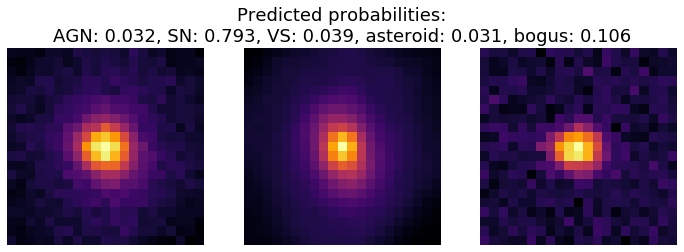

Predicted probabilities:
AGN: 0.096, SN: 0.089, VS: 0.121, asteroid: 0.654, bogus: 0.039, 
[0.09616417 0.08944801 0.12137865 0.65374047 0.03926868]
ZTF19abqgzea


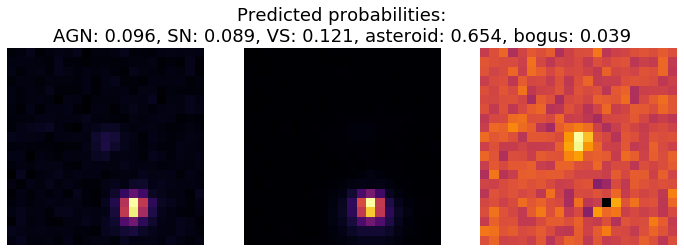

Predicted probabilities:
AGN: 0.052, SN: 0.864, VS: 0.029, asteroid: 0.03, bogus: 0.025, 
[0.05248979 0.8642216  0.02895325 0.02972704 0.02460833]
ZTF19aammlzn


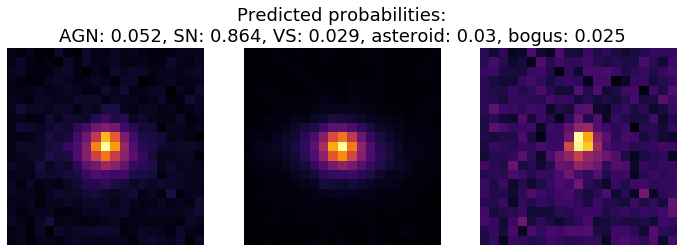

Predicted probabilities:
AGN: 0.021, SN: 0.848, VS: 0.032, asteroid: 0.047, bogus: 0.053, 
[0.02116745 0.84787935 0.03161649 0.04677973 0.05255704]
ZTF19aatevrp


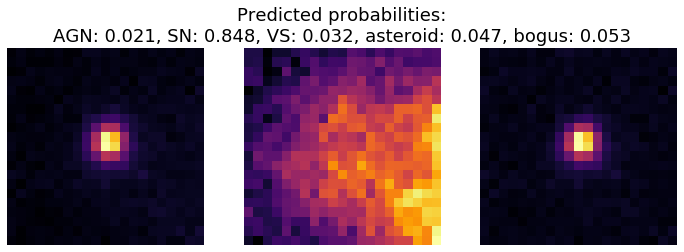

Predicted probabilities:
AGN: 0.021, SN: 0.061, VS: 0.106, asteroid: 0.678, bogus: 0.134, 
[0.02141687 0.06051445 0.10568622 0.6783113  0.13407116]
ZTF19aasszud


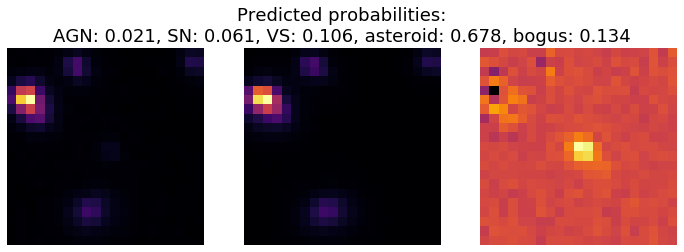

Predicted probabilities:
AGN: 0.008, SN: 0.89, VS: 0.036, asteroid: 0.011, bogus: 0.055, 
[0.00789795 0.89047134 0.03582082 0.01094508 0.05486482]
ZTF19acgouje


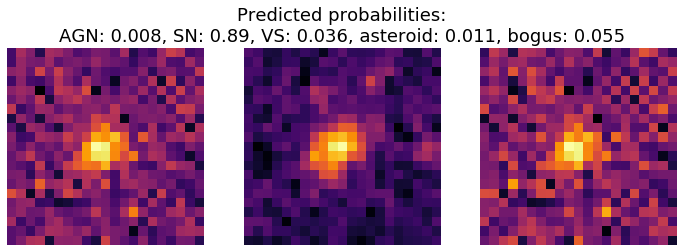

Predicted probabilities:
AGN: 0.033, SN: 0.885, VS: 0.032, asteroid: 0.04, bogus: 0.011, 
[0.03313913 0.8851454  0.0315918  0.03956614 0.01055742]
ZTF19abueupg


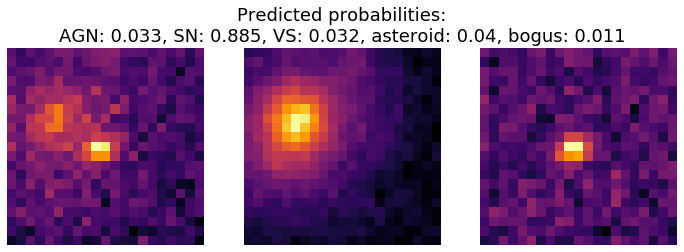

Predicted probabilities:
AGN: 0.103, SN: 0.61, VS: 0.092, asteroid: 0.082, bogus: 0.113, 
[0.10302801 0.60974157 0.09232602 0.08230457 0.11259982]
ZTF19abqsvgf


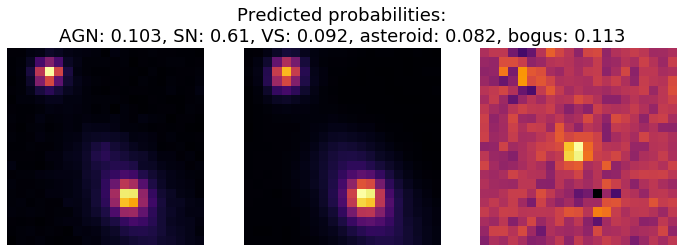

Predicted probabilities:
AGN: 0.072, SN: 0.801, VS: 0.044, asteroid: 0.049, bogus: 0.034, 
[0.07227611 0.8014457  0.04395496 0.04871316 0.03361005]
ZTF18abcecfi


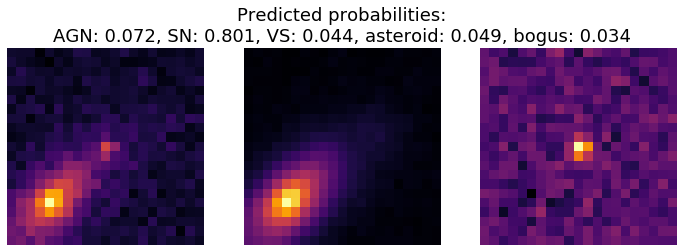

Predicted probabilities:
AGN: 0.025, SN: 0.929, VS: 0.019, asteroid: 0.015, bogus: 0.012, 
[0.02534155 0.92870027 0.01898893 0.01460576 0.01236341]
ZTF19aclobbu


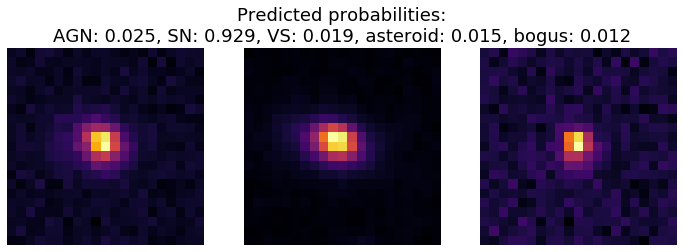

Predicted probabilities:
AGN: 0.036, SN: 0.066, VS: 0.04, asteroid: 0.796, bogus: 0.061, 
[0.03634477 0.06628592 0.04035988 0.79573786 0.06127158]
ZTF19abuayqg


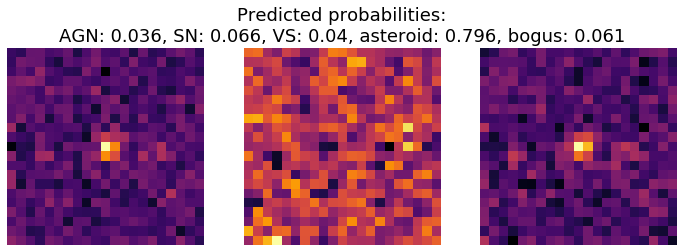

Predicted probabilities:
AGN: 0.324, SN: 0.479, VS: 0.034, asteroid: 0.125, bogus: 0.038, 
[0.32352784 0.4791421  0.03422814 0.12500449 0.03809754]
ZTF19ablesob


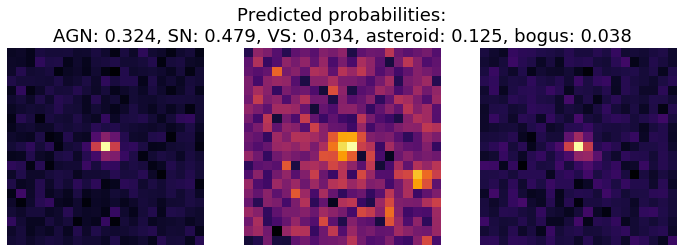

In [11]:
class_names = ["AGN", "SN", "VS", "asteroid", "bogus"]
for i in range(250):
    if test_set.data_label[i] == 1:
        pred = model.predict_proba(test_set.data_array[i, :])
        pred = pred[0, ...]
        ztf_id = test_set.meta_data[i, -1]
        plot_examples(test_set.data_array[i, :], pred, class_names, ztf_id)

# ROC curve

In [7]:
%matplotlib inline
import os
import sys

import matplotlib.pyplot as plt
import numpy as np

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf

tf.autograph.set_verbosity(2)

PROJECT_PATH = os.path.join("..")
sys.path.append(PROJECT_PATH)
from models.classifiers.deepHits_nans_norm_crop_stamp_model import (
    DeepHiTSNanNormCropStampModel,
)
from models.classifiers.deepHits_entopy_reg_model import DeepHiTSEntropyRegModel
from parameters import param_keys, general_keys
from modules.data_set_generic import Dataset
from scripts.plot_confusion_matrix import plot_confusion_matrix

# from sklearn.metrics import plot_confusion_matrix

import warnings

warnings.filterwarnings("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)

from IPython.display import display_html
from glob import glob

np.random.seed(1)

In [8]:
beta5_paths = glob(
    os.path.join(
        PROJECT_PATH,
        "results/alerce_dpereataset_entropy_reg/DeepHitsEntropyRegBeta0.5000_*",
    )
)
beta5_paths

normal_model_paths = glob(
    os.path.join(
        PROJECT_PATH,
        "results/alerce_dataset_entropy_reg/DHNan0NormStampWBogusCropValLoss_*",
    )
)

In [9]:
# instance model and load weights

data_path = os.path.join("../../pickles", "training_set_Nov-26-2019.pkl")
# data_path = "../../pickles/converted_data.pkl"

n_classes = 5
params_best_so_far = {
    param_keys.DATA_PATH_TRAIN: data_path,
    param_keys.WAIT_FIRST_EPOCH: False,
    param_keys.N_INPUT_CHANNELS: 3,
    param_keys.CHANNELS_TO_USE: [0, 1, 2],
    param_keys.TRAIN_ITERATIONS_HORIZON: 30000,
    param_keys.TRAIN_HORIZON_INCREMENT: 10000,
    param_keys.TEST_SIZE: n_classes * 50,
    param_keys.VAL_SIZE: n_classes * 50,
    param_keys.NANS_TO: 0,
    param_keys.NUMBER_OF_CLASSES: n_classes,
    param_keys.CROP_SIZE: 21,
    param_keys.INPUT_IMAGE_SIZE: 21,
    param_keys.VALIDATION_MONITOR: general_keys.LOSS,
    param_keys.VALIDATION_MODE: general_keys.MIN,
    param_keys.ENTROPY_REG_BETA: None,
}

model_list = []

normal_model_list = []

for model_path in normal_model_paths:
    graph = tf.Graph()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(graph=graph, config=config)

    with graph.as_default():
        regular_model = DeepHiTSNanNormCropStampModel(params_best_so_far, session=sess)
        checkpoint_path_best_so_far = os.path.join(model_path + "/checkpoints", "model")
        regular_model.load_model(checkpoint_path_best_so_far)
        normal_model_list.append(regular_model)

params_best_so_far.update({param_keys.ENTROPY_REG_BETA: 0.5})

for model_path in beta5_paths:
    graph = tf.Graph()
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    sess = tf.Session(graph=graph, config=config)

    with graph.as_default():
        regular_model = DeepHiTSEntropyRegModel(params_best_so_far, session=sess)
        checkpoint_path_best_so_far = os.path.join(model_path + "/checkpoints", "model")
        regular_model.load_model(checkpoint_path_best_so_far)
        model_list.append(regular_model)

INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f906a94b3b0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8fd80adef0> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8fd80adef0> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8fd80adef0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f9024054d90>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8fd0494150>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8fd0494150>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Restoring parameters from ../results/alerce_dataset_entropy_reg/DHNan0NormStampWBogusCropValLoss_8_20191126-151822/checkpoints/model
INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f906a94b3b0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8f900c9fd0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8f900c9fd0>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8f900c9fd0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8f9031ebd0>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8f9031ebd0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call o

INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f8f70618550>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8f706fc550>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8f706fc550>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8f7072c690>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8f7072c690>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f703adad0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8f700c8250>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8f700c8250>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f8f700c8250>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f8f700c8250>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bo

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f44e43a50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f44e43fd0>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f44e43fd0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f44d49c90>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f44d49c90>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bou

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f44bc8a90>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8f44abd450>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8f44abd450>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f44a1add0>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f44a1add0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Convert

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f900c584fd0>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f900c584fd0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f900c584d50>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f900c584d50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f900c53b750>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32)

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f907095ac20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8fe4120310>>
    ar

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f90580c09e0> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f90580c09e0> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f90580c09e0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Conve

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f907095ac20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None

INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f906a94b3b0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Defaults o

INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8fe46450e0> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8fe46450e0> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f907095ac20>
    args:

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f9058293310>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Restoring parameters from ../results/alerce_dataset_entropy_reg/DHNan0NormStampWBogusCropValLoss_0_20191126-143016/checkpoints/model
INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f906a94b3b0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8fe4586050> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8fe4575150>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8fe4578dd0>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8fe4578dd0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f900c603a10>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f900c603a10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Restoring parameters from ../results/alerc

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8fd8760d10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8fd8746090>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8fd8746090>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8fd8760d10>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8fd8760d10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8fe43c4fd0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f8fe43c4fd0>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f8fe43c4fd0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f902474dd50>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f902474dd50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f900c523a90>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f90240f3590>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f90240f3590>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f900c528350>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f900c528350>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted 

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8f444c0450>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f444bced0>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f444bced0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f444bc810>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f444bc810>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted ca

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f44158b10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f442ac5d0>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f442ac5d0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8f4415d2d0>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8f4415d2d0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted 

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f907095ac20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f3c5bcf50>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8f3c5bcf50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensor

INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8f3c399d40> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8f3c399d40> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f907095ac20>
    args:

INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f906a94b3b0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8f185cd170> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8f185cd170> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8f185cd170> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f907095ac20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None

INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f906a94b3b0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) d

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8ee8701560> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8ee8701560> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8ee8701560> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Conve

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8ee866ca90>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8ee8673810>>
    args: (<tf.Tensor 'network/cyclic_avg_pool_1_11/Mean:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8ee8673810>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Restoring parameters from ../results/alerce_dataset_entropy_reg/DeepHitsEntropyRegBeta0.5000_4_20191202-171445/checkpoints/model
INFO:tensorflow:Converted call: <function augment_with_rotations at 0x7f906a94b3b0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'args_1:0' shape=<unknown> dtype=int64>)
    kwargs: {}

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f90

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8ee81b5c10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8ee81b5c10>>
    args: (<tf.Tensor 'network/dense_1_9/dp/Identity:0' shape=(?, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8ee81b5c10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8ee8164fd0>>
    args: (<tf.Tensor 'network/dense_2_10/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8ee8164fd0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call o

INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f8ee0703250>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8ee0546b50>>
    args: (<tf.Tensor 'network/flatten_1_8/Reshape:0' shape=(?, 2304) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Dense.call of <tensorflow.python.layers.core.Dense object at 0x7f8ee0546b50>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8ee0567a90>>
    args: (<tf.Tensor 'network/dense_1_9/Relu:0' shape=(?, 64) dtype=float32>,)
    kwargs: {'training': False}

INFO:tensorflow:Whitelisted: <bound method Dropout.call of <tensorflow.python.layers.core.Dropout object at 0x7f8ee0567a90>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Dense.call of

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ee02a7e10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8ee03595d0>>
    args: (<tf.Tensor 'network/conv_5_6/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8ee03595d0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f8ee03595d0>>
    args: (<tf.Tensor 'network/down_2_7/MaxPool:0' shape=(?, 6, 6, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Flatten.call of <tensorflow.python.layers.core.Flatten object at 0x7f8ee03595d0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bo

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ed0637850>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ed0743050>>
    args: (<tf.Tensor 'network/conv_3_4/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ed0743050>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ed059bb10>>
    args: (<tf.Tensor 'network/conv_4_5/Relu:0' shape=(?, 12, 12, 64) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ed059bb10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bou

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ed028cc10>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8ed0293490>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8ed0293490>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ed028c850>>
    args: (<tf.Tensor 'network/down_1_3/MaxPool:0' shape=(?, 12, 12, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ed028c850>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Convert

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ea8679710>>
    args: (<tf.Tensor 'network/padding:0' shape=(?, 27, 27, 3) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ea8679710>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ea8fb78d0>>
    args: (<tf.Tensor 'network/conv_1_1/Relu:0' shape=(?, 24, 24, 32) dtype=float32>,)
    kwargs: {}

INFO:tensorflow:Whitelisted: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ea8fb78d0>>: DoNotConvert rule for tensorflow
INFO:tensorflow:Converted call: <bound method Pooling2D.call of <tensorflow.python.layers.pooling.MaxPooling2D object at 0x7f8ea8681910>>
    args: (<tf.Tensor 'network/conv_2_2/Relu:0' shape=(?, 24, 24, 32)

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 2}

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 3}

INFO:tensorflow:Converted call: <function concat at 0x7f907095ac20>
    args: ([<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_1/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>, <tf.Tensor 'rot90_2/cond/Identity:0' shape=(?, 21, 21, 3) dtype=float32>], 0)
    kwargs: None

INFO:tensorflow:Converted call: <bound method Conv.call of <tensorflow.python.layers.convolutional.Conv2D object at 0x7f8ea82ceb10>>
    ar

INFO:tensorflow:Not whitelisted: <method-wrapper '__call__' of function object at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Not whitelisted: <function augment_with_rotations at 0x7f906a94b3b0>: default rule
INFO:tensorflow:Defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8ea06e7b00> : None
INFO:tensorflow:KW defaults of <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8ea06e7b00> : None
INFO:tensorflow:Calling <function create_converted_entity_factory.<locals>.create_converted_entity.<locals>.tf__augment_with_rotations at 0x7f8ea06e7b00> with
    img_batch: Tensor("args_0:0", shape=(?, 21, 21, 3), dtype=float32)
    labels: Tensor("args_1:0", dtype=int64)

INFO:tensorflow:Converted call: <function rot90 at 0x7f906f7a6cb0>
    args: (<tf.Tensor 'args_0:0' shape=(?, 21, 21, 3) dtype=float32>,)
    kwargs: {'k': 1}

INFO:tensorflow:Conve

In [10]:
train_set, val_set, test_set = model_list[0]._data_init()

  0%|          | 26/36262 [00:00<02:21, 255.77it/s]

{'AGN': 0, 'SN': 1, 'VS': 2, 'asteroid': 3, 'bogus': 4}


100%|██████████| 36262/36262 [01:23<00:00, 436.52it/s]


Label count AGN: 9996 -SN: 1079 -VS: 9938 -asteroid: 9899 -bogus: 5350 -
467 misshaped samples removed
Label count AGN: 9844 -SN: 1067 -VS: 9766 -asteroid: 9797 -bogus: 5321 -
4427 samples with NaNs. NaNs replaced with number 0


In [11]:
def get_roc(prob, labels, n_th=500):
    total_true = np.sum(labels == 1)
    total_false = np.sum(labels == 0)

    precision = []
    recall = []

    roc_x = []
    roc_y = []

    for th in np.linspace(start=0, stop=1, num=n_th):

        true_positive = np.sum(np.logical_and(prob >= th, labels == 1)) / np.sum(labels)
        true_negative = np.sum(np.logical_and(prob < th, labels == 0)) / np.sum(
            np.logical_not(labels)
        )
        false_positive = np.sum(np.logical_and(prob >= th, labels == 0)) / np.sum(
            np.logical_not(labels)
        )
        false_negative = np.sum(np.logical_and(prob < th, labels == 1)) / np.sum(labels)

        th_recall = true_positive / (true_positive + false_negative)
        th_precision = true_positive / (true_positive + false_positive)

        recall.append(th_recall)
        precision.append(th_precision)
        roc_x.append(false_positive)
        roc_y.append(true_positive)

    return np.array(roc_x), np.array(roc_y), np.linspace(start=0, stop=1, num=n_th)

In [12]:
roc_curves = []
normal_roc_curves = []
for i, model in enumerate(model_list):
    probabilities = model.predict_proba(test_set.data_array)
    sn_pred = probabilities[:, 1]
    sn_labels = test_set.data_label == 1
    roc_curves.append(get_roc(sn_pred, sn_labels))

    probabilities = normal_model_list[i].predict_proba(test_set.data_array)
    sn_pred = probabilities[:, 1]
    sn_labels = test_set.data_label == 1
    normal_roc_curves.append(get_roc(sn_pred, sn_labels))

roc_curves = np.stack(roc_curves)
normal_roc_curves = np.stack(normal_roc_curves)

(3, 500)
(3, 500)
MAX DIFF 0.08303030303030301
[0.01212121 0.74393939]
y values at * 0.6609090909090909 0.7439393939393939
std values at * 0.04 0.03


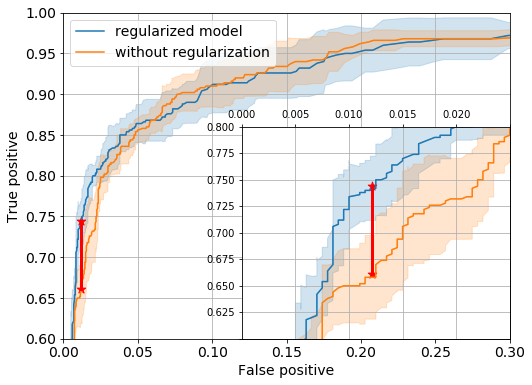

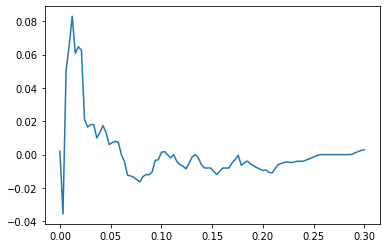

In [13]:
def add_subplot_axes(ax, rect, axisbg="w"):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x, y, width, height], axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2] ** 0.5
    y_labelsize *= rect[3] ** 0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax


def plot_roc(roc_curves_list, plot_labels, n_bars=1, fontsize=14, savepath=None):

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)

    colors = ["C0", "C1", "C2", "C3"]
    model_mean = {}
    model_std = {}

    rect = [0.4, 0, 0.6, 0.65]
    zoom_plot_ax = ax.inset_axes(rect)

    for i, roc_curves in enumerate(roc_curves_list):

        roc_mean = np.mean(roc_curves, axis=0)
        roc_std = np.std(roc_curves, axis=0)
        print(roc_mean.shape)

        sort_index = np.argsort(roc_mean[0, ...])
        model_mean[plot_labels[i]] = np.interp(
            np.linspace(0, 0.3, num=100),
            roc_mean[0, ...][sort_index],
            roc_mean[1, ...][sort_index],
        )
        model_std[plot_labels[i]] = np.interp(
            np.linspace(0, 0.3, num=100),
            roc_mean[0, ...][sort_index],
            roc_std[1, ...][sort_index],
        )

        upper_limit = roc_mean[1, :] + roc_std[1, :] * n_bars
        lower_limit = roc_mean[1, :] - roc_std[1, :] * n_bars

        ax.fill_between(
            roc_mean[0, ...], roc_mean[1, ...], upper_limit, alpha=0.2, color=colors[i]
        )
        ax.fill_between(
            roc_mean[0, ...], roc_mean[1, ...], lower_limit, alpha=0.2, color=colors[i]
        )
        ax.plot(roc_mean[0, ...], roc_mean[1, ...], label=plot_labels[i])
        ax.set_xlabel("False positive", fontsize=fontsize)
        ax.set_ylabel("True positive", fontsize=fontsize)
        ax.tick_params(axis="both", labelsize=14)

        zoom_plot_ax.fill_between(
            roc_mean[0, ...], roc_mean[1, ...], upper_limit, alpha=0.2, color=colors[i]
        )
        zoom_plot_ax.fill_between(
            roc_mean[0, ...], roc_mean[1, ...], lower_limit, alpha=0.2, color=colors[i]
        )
        zoom_plot_ax.plot(roc_mean[0, ...], roc_mean[1, ...])

        ### LINE GRADIENT ###
        """
        points = np.array([roc_mean[0, ...], roc_mean[1, ...]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)
        # Create a continuous norm to map from data points to colors
        norm = plt.Normalize(0, 1)
        lc = LineCollection(segments, cmap='viridis', norm=norm)
        # Set the values used for colormapping
        lc.set_array(roc_mean[2, ...])
        lc.set_linewidth(2)
        line = ax.add_collection(lc)"""

    # cbar = f.colorbar(line, ax=ax)
    # ticklabs = cbar.ax.get_yticklabels()
    # cbar.ax.set_yticklabels(ticklabs, fontsize=14)

    zoom_plot_ax.set_xlim([0, 0.025])
    zoom_plot_ax.set_ylim([0.60, 0.8])
    zoom_plot_ax.xaxis.tick_top()

    roc_diff = model_mean[plot_labels[0]] - model_mean[plot_labels[1]]
    print("MAX DIFF", np.amax(roc_diff))
    center_index = np.where(roc_diff == np.amax(roc_diff))[0]
    center = (
        np.linspace(0, 0.3, num=100)[center_index[0]],
        model_mean[plot_labels[0]][center_index[0]],
    )
    center = np.array(center)
    center[1] = center[1]
    # center = np.array([0.04, 0.85])
    print(center)
    print("y values at *", center[1] - np.amax(roc_diff), center[1])
    print("std values at *", 0.04, 0.03)

    size = 0.02
    ax.plot(
        [center[0], center[0]], (center[1], center[1] - np.amax(roc_diff)), "r", lw=3
    )
    ax.scatter(center[0], center[1], marker="*", s=80, color="r")
    ax.scatter(center[0], center[1] - np.amax(roc_diff), marker="*", s=80, color="r")

    zoom_plot_ax.plot(
        [center[0], center[0]], (center[1], center[1] - np.amax(roc_diff)), "r", lw=3
    )
    zoom_plot_ax.scatter(center[0], center[1], marker="*", s=80, color="r")
    zoom_plot_ax.scatter(
        center[0], center[1] - np.amax(roc_diff), marker="*", s=80, color="r"
    )
    zoom_plot_ax.grid()
    """
    rect = patches.Rectangle(center-size/2,size,size,linewidth=3,edgecolor='C0',facecolor='none')
    # ax.text(center[0]+size*(3/4), center[1]-size/2, 'th=0.2', fontsize=fontsize, color="r")
    ax.add_patch(rect)
    """
    """
    center = np.array([0.15, 0.95])
    print(center)
    size=0.02
    rect = patches.Rectangle(center-size/2,size,size,linewidth=3,edgecolor='C1',facecolor='none')
    # ax.text(center[0]+size*(3/4), center[1]-size/2, 'th=0.2', fontsize=fontsize, color="r")
    ax.add_patch(rect)
    """
    plt.ylim([0.6, 1])
    plt.xlim([0, 0.3])

    ax.legend(fontsize=fontsize)
    ax.grid(which="both")
    if savepath is not None:
        plt.savefig(savepath, bbox_inches="tight")

    labels = zoom_plot_ax.get_yticklabels()
    labels[0] = ""
    zoom_plot_ax.set_yticklabels(labels)
    labels = zoom_plot_ax.get_xticklabels()
    labels[-1] = ""
    zoom_plot_ax.set_xticklabels(labels)

    plt.show()

    plt.plot(
        np.linspace(0, 0.3, num=100),
        model_mean[plot_labels[0]] - model_mean[plot_labels[1]],
    )

    plt.show()


plot_roc(
    [roc_curves, normal_roc_curves],
    plot_labels=["regularized model", "without regularization"],
    savepath="plots/roc_errors.pdf",
)